# Project 3: 
## Reinforcement Learning and Inverse Reinforcement Learning

## 1. Introduction
**Reinforcement Learning (RL)** is the task of learning from interaction to achieve a goal. The learner and the decision maker is called the **agent**. The thing it interacts with, comprising everything outside the agent, is called the **environment**. These interact continually, the agent selecting actions and the environment responding to those actions by presenting rewards and new states.

In the first part of the project, we learn the **optimal policy** of an agent navigating in a 2-D environment. We  implement the **Value iteration algorithm** to learn the optimal policy. 

**Inverse Reinforcement Learning (IRL)** is the task of extracting an expert's reward function by observing the optimal policy of the expert. In the second part of the project, we will explore the application of IRL in the context of apprenticeship learning.

## 2. Reinforcement Learning (RL)
The two main objects in Reinforcement learning are:
- Agent
- Environment
In this project, we learn the optimal policy of a single agent navigating in a 2D environment.

### 2.1 Environment
In this project, we assume that the environment of the agent is modeled by a **Markov Decision Process (MDP)**. In a MDP, agents occupy a state of the environment and perform actions to change the state they are in. After taking an action, they are given some representation of the new state and some reward value associated with the new state.
![MDP](img/mdp.png)

In the next few subsections, we will discuss the parameters that will be used to generate the environment for the project.

#### 2.1.1 State Space
In this project, we consider the state space to be a 2-D square grid with 100 states. The 2-D square grid along with the numbering of the states is shown in Figure 1.
![Figure 1: 2-D square grid with state numbering](img/fig1.png)

#### 2.1.2 Action Set
Action set ($A$) contains four following actions:
- Move right
- Move left
- Move Up
- Move Down

The 4 types of actions are displayed in Figure 2:
![actions](img/fig2.png)

From the above Figure, we can see that the agent can take 4 actions from the state marked with a dot.

#### 2.1.3 Transition Probabilities
In this project, we define the transition probabilities in the following manner:
1. If state $s'$ and $s$ are not neighboring states in the 2-D grid, then **P**($s_{t+1} = s'|s_t = s, a_t = a$) = 0. $s'$ and $s$ are neighbors in the 2-D grid if you can move to $s'$ from $s$ by taking an action a from the action set $A$. We will consider a state $s$ to be a neighbor of itself. For example, from Figure 1 we can observe that states 1 and 11 are neighbors (we can transition from 1 to 11 by moving right) but states 1 and 12 are not neighbors.

2. Each action corresponds to a movement in the intended direction with probability 1 - $w$, but has a probability of $w$ of moving in a random direction instead due to wind. To illustrate this, let's consider the states shown in Figure 3
![title](img/fig3.png)

The transition probabilities for the non-boundary states shown in figure 3 are given below:
![title](img/trans_prob.png)
From the above calculation it can be observed that if the agent is at a non-
boundary state then it has 4 neighbors excluding itself and the probability
w is uniformly distributed over the 4 neighbors. Also, if the agent is at
a non-boundary state then it transitions to a new state after taking an
action (**P**($s_{t+1} = 44|s_t = 44, a_t = \uparrow$) = 0)

3. If the agent is at one of the four corner states (0,9,90,99), the agent stays at the current state if it takes an action to move off the grid or is blown off the grid by wind. The actions can be divided into two categories:

-- Action to move off the grid

-- Action to stay in the grid

To illustrate this, let's consider the states shown in Figure 4:
![title](img/fig4.png)

The transition probabilities for taking an action to move off the grid are given below:
![trans](img/trans_fig4_1.png)

The transition probabilities for taking an action to stay in the grid are given below:
![trans](img/trans_fig4_2.png)

At a corner state, you can be blown off the grid in two directions. As a result, we have **P**($s_{t+1} = 0|s_t = 0, a_t = \rightarrow$) = $w$/4 + $w$/4 since we can be blown off the grid in two directions and in both the cases we stay at the current state.

4. If the agent is at one of the edge states, the agent stays at the current state if it takes an action to move off the grid or is blown off the grid by wind. The actions can be divided into two categories:

-- Action to move off the grid

-- Action to stay in the grid

To illustrate this, let's consider the states shown in Figure 5:
![edge states](img/fig5.png)

The transition probabilities for taking an action to move off the grid are given below:
![trans_prob](img/trans_fig5_1.png)
The transition probabilities for taking an action to stay in the grid are given below:
![trans_prob](img/trans_fig5_2.png)

At an edge state, you can be blown off the grid in one direction. As a result, we have **P**($s_{t+1} = 1|s_t = 1, a_t = \uparrow$) = $w$/4 since we can be blown off the grid in one direction and in that case we stay at the current state.

The main difference between a corner state and an edge state is that a corner state has 2 neighbors and an edge state has 3 neighbors.

#### 2.1.4. Reward Function
To simplify the project, we will assume that the reward function is independent of the current state ($s$) and the action that you take at the current state ($a$).

To be specific, reward function only depends on the state that you transition to
($s'$). 

With this simplifcation, we have $R^a_{ss'}$ = *R*(*s'*)

In this project, we learn the optimal policy of an agent for two different reward functions:
- Reward function 1
- Reward function 2

The two different reward functions are displayed in Figures 6 and 7 respectively
![Reward Funciton 1](img/fig6.png)
![Reward Function 2](img/fig7.png)

#### Question 1: 
For visualization purpose, generate heat maps of Reward function 1 and Reward function 2. For the heat maps, make sure you display the coloring scale. You will have 2 plots for this question.

Reference function: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pcolor.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
reward1 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, -10, -10, 0, 0, 0],
                   [0, 0, 0, 0, 0, -10, -10, 0, 0, 0],
                   [0, -10, -10, 0, 0, 0, 0, 0, 0, 0],
                   [0, -10, -10, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, -10, -10, 0, 0, 0, 0, 0, 0],
                   [0, 0, -10, -10, 0, 0, 0, 0, 0, 1]]
                  )
reward2 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, -100, -100, -100, 0, 0, 0],
                   [0, 0, 0, 0, -100, 0, -100, 0, 0, 0],
                   [0, 0, 0, 0, -100, 0, -100, -100, -100, 0],
                   [0, 0, 0, 0, -100, 0, 0, 0, -100, 0],
                   [0, 0, 0, 0, -100, 0, 0, 0, -100, 0],
                   [0, 0, 0, 0, -100, 0, 0, 0, -100, 0],
                   [0, 0, 0, 0, 0, 0, -100, -100, -100, 0],
                   [0, 0, 0, 0, 0, 0, -100, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 10]]
                  )

In [3]:
def plot_heatmap(arr, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(arr, cmap='hot')
    plt.colorbar()
#     plt.gca().invert_yaxis()
    plt.show()

def plot_grid_value(n, V, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(np.zeros((n, n)), cmap='hot', vmin=-1, vmax=0)
    for (j, i), v in np.ndenumerate(V):
        if isinstance(v, str):
            plt.text(i, j, v, ha='center', va='center')
        else:
            plt.text(i, j, round(v, 3), ha='center', va='center')
    for i in range(n - 1):
        plt.vlines(0.5 + i, -0.5, 9.5)
        plt.hlines(0.5 + i, -0.5, 9.5)
 
    plt.title(title)
    plt.show()
    
def plot_policy(n, pi, title):
    arrows = ['←','→', '↑','↓']
    pi_arrow = [['' for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(n):
            pi_arrow[i][j] = arrows[int(pi[i, j])]
    plot_grid_value(n, pi_arrow, title)

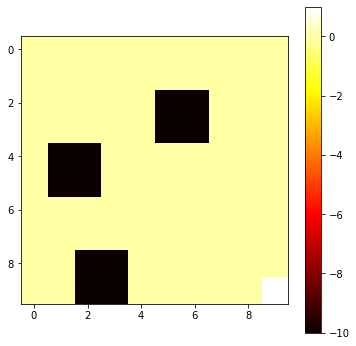

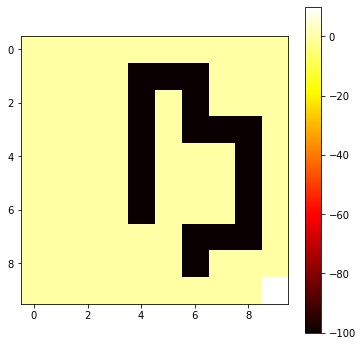

In [4]:
plot_heatmap(reward1, 'Heat map of Reward function 1')
plot_heatmap(reward2, 'Heat map of Reward function 2')

## 3. Optimal policy learning using RL algorithms

In this part of the project, we will use reinforcement learning (RL) algorithm
to find the optimal policy. The main steps in RL algorithm are:
- Find optimal state-value or action-value
- Use the optimal state-value or action-value to determine the deterministic optimal policy

There are a couple of RL algorithms, but we will use the *Value iteration algorithm* since it was discussed in detail in the lecture. We will skip the derivation of the algorithm here because it was covered in the lecture (for the derivation details please refer to the lecture slides on Reinforcement learning). We will just reproduce the algorithm below for the ease of implementation:
![title](img/opt_policy.png)

#### Question 2: 
Create the environment of the agent using the information provided in **Section 2**. To be specific, create the MDP by setting up the state-space, action set, transition probabilities, discount factor, and reward function. For creating the environment, use the following set of parameters:

• Number of states |$S$| = 100 (state space is a 10 by 10 square grid as displayed
in figure 1, n = 10)

• Number of actions |$A$|= 4 (set of possible actions is displayed in figure 2)

• $w$ = 0.1

• Discount factor $\gamma$ = 0.8

• Reward function 1

After you have created the environment, then write an optimal state-value function that takes as input the environment of the agent and outputs the optimal value of each state in the grid. For the optimal state-value function, you have to implement the Initialization (lines 2-4) and Estimation (lines 5-13) steps of the Value Iteration algorithm. For the estimation step, use $\epsilon$ = 0.01. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal value of that state. In this part of question, you should have 1 plot.

Let’s assume that your value iteration algorithm converges in N steps. Plot snapshots of state values in 5 different steps linearly distributed from 1 to N. Report N and your step numbers. What observations do you have from the plots?

In [10]:
class Environment():
    
    def __init__(self, n, na, w, gamma, reward):
        # initialize parameters 
        # n for single dimension length, na for number of actions
        # w for random prob., gamma for discount factor
        self.n = n
        self.na = na
        self.w = w
        self.gamma = gamma
        # initialize reward function
        self.reward = reward
        
        # initialize the states
        self.states = []
        for i in range(self.n):
            for j in range(self.n):
                self.states.append((i, j))
        
        # initialize the actions, 0, 1, 2, 3 = left, right, up, down
        self.actions = [0, 1, 2, 3]
        
        # initialize transition_matrix (A, S, S')
        self.transition_matrix = np.zeros((self.na, self.n**2, self.n**2))
        
    def get_candi(self, s, a):
        # generate candidate states and corresponding probs.
        # clipping with min max allows candidates of corner/edge states to be itself.
        candi = [(s[0], max(s[1]-1, 0)), (s[0], min(self.n-1, s[1]+1)),
                 (max(s[0]-1, 0), s[1]), (min(self.n-1, s[0]+1), s[1])]
        
        # all cancidates can be randomly visited
        prob = [self.w / self.na for i in range(self.na)]
        # the action specific state has larger probability 1-w to be visited 
        prob[a] += (1 - self.w)
        
        return candi, prob
    
    def cor2ind(self, s):
        return self.n * s[0] + s[1]
    
    def ind2cor(self, i):
        return (i // self.n, i % self.n)
    
    def create_transition_matrix(self):
        # create_transition_matrix based on environment
        self.transition_matrix = np.zeros((self.na, self.n**2, self.n**2))
        for a in self.actions:
            for i, s in enumerate(self.states):
                candi, prob = self.get_candi(s, a)
                for j in range(self.na):
                    self.transition_matrix[a, i, self.cor2ind(candi[j])] += prob[j]
    
    def get_expectation(self, s, a, V):
        # calculate the value expectation of taking action a at state s
        # V is the value function calculated at early episode
        candi, prob = self.get_candi(s, a)
        expectation = sum([prob[i]*(self.reward[candi[i]] + self.gamma*V[candi[i]]) 
                           for i in range(self.na)])       
        return expectation
    
    def step(self, s, a):
        candi, prob = self.get_candi(s, a)
        sp = np.random.choice(candi, 1, prob=prob)
        r = self.reward[a]
        return sp, r
    
    def set_w(self, w):
        self.w = w
    
    def get_stateslen(self):
        return self.n
    
    def get_states(self):
        return self.states
    
    def get_actions(self):
        return self.actions
    
    def get_transition_matrix(self):
        return self.transition_matrix

In [6]:
def value_iteration(env, eps, snapshots=False):
    """
    inputs:
      environment: 
      n, na, w 
      gamma     RL discount
      reward    N x 1 (N: number of states)
      
      eps       estimation error epsilon, threshold for stop
    
    returns:
      policy    N x 1 
      values    N x 1 
    """
    # initialize value function
    pi = np.zeros((env.get_stateslen(), env.get_stateslen()))
    V = np.zeros((env.get_stateslen(), env.get_stateslen()))
    delta = np.Inf
    steps = 0
    while delta > eps:
        steps += 1
        delta = 0
        for s in env.get_states():
            v = -np.Inf
            for a in env.get_actions():
                v = max(v, env.get_expectation(s, a, V))
            delta = max(delta, abs(v-V[s]))
            V[s] = v
    
    # Computation Step
    for s in env.get_states():
        v = -np.Inf
        for a in env.get_actions():
            exp = env.get_expectation(s, a, V)
            if exp > v:
                v = exp
                pi[s] = a
    
    # This is the snapshots required only for Q2. 
    # Basically for V.I. using 'pi, V = value_iteration(env, eps)' is enough 
    if snapshots:
        V = np.zeros((env.get_stateslen(), env.get_stateslen()))
        shot_interval = steps // 5
        shots = []
        for i in range(steps):
            for s in env.get_states():
                v = -np.Inf
                for a in env.get_actions():
                    v = max(v, env.get_expectation(s, a, V))
                V[s] = v
            if i != 0 and i % shot_interval == 0:
                shots.append(V.copy())
        return steps, shots, pi, V
    else:
        return pi, V

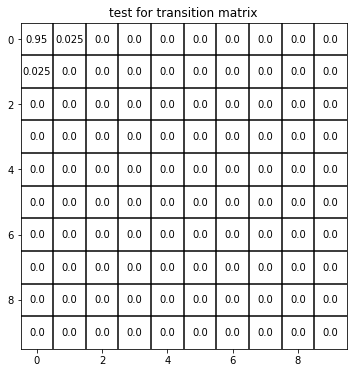

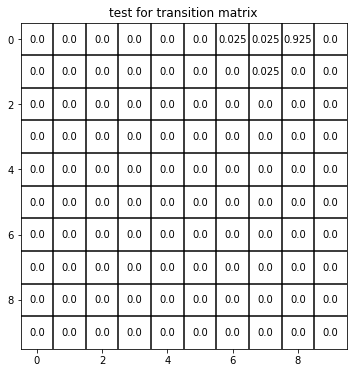

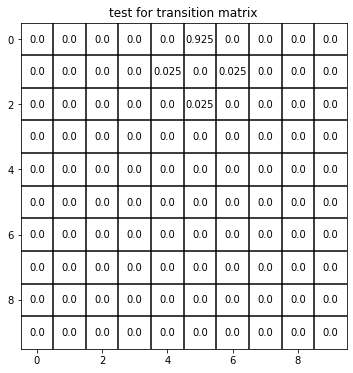

In [19]:
# test cell
n = 10
na = 4
w = 0.1
gamma = 0.8
# estimation step epsilon
eps = 0.01

env1 = Environment(n, na, w, gamma, reward1)
env1.create_transition_matrix()
tm = env1.get_transition_matrix()

plot_grid_value(n, tm[0][0].reshape((n, n)), 'test for transition matrix') # state(0, 0) action left
plot_grid_value(n, tm[1][7].reshape((n, n)), 'test for transition matrix') # state(0, 7) action right
plot_grid_value(n, tm[2][15].reshape((n, n)), 'test for transition matrix') # state(1, 5) action up

In [ ]:
# state space size
n = 10
na = 4
w = 0.1
gamma = 0.8
# estimation step epsilon
eps = 0.01

env1 = Environment(n, na, w, gamma, reward1)
steps, shots, pi_1, V_1 = value_iteration(env1, eps, snapshots=True)

In [ ]:
plot_grid_value(n, V_1, 'Optimal value of states using Reward 1')

In [ ]:
for i, shot in enumerate(shots):
    plot_grid_value(n, shot, 'Snapshot {} of 5, step {} of {}'.format(i+1, (i+1)*(steps//5), steps)) 

#### Question 3: 
Generate a heat map of the optimal state values across the 2-D grid. For generating the heat map, you can use the same function provided in the hint earlier (see the hint after question 1).

In [ ]:
plot_heatmap(V_1, 'Heat map of Optimal values using Reward 1')

#### Question 4: 
Explain the distribution of the optimal state values across the 2-D grid. (Hint: Use the figure generated in *Question 3* to explain)

**Will be stated in the report.**

#### Question 5:  
Implement the computation step of the value iteration algorithm (lines 14-17) to compute the optimal policy of the agent navigating the 2-D state-space. For visualization purpose, you should generate a figure similar to that of *Figure 1* but with the number of state replaced by the optimal action at that state. The optimal actions should be displayed using arrows. Does the optimal policy of the agent match your intuition? Please provide a brief explanation. Is it possible for the agent to compute the optimal action to take at each state by observing the optimal values of it’s neighboring states? In this question, you should have 1 plot.

In [ ]:
plot_policy(n, pi_1, 'Optimal policy showing in arrows using Reward 1')

#### Question 6:  
Modify the environment of the agent by replacing Reward function 1 with Reward function 2. Use the optimal state-value function implemented in question 2 to compute the optimal value of each state in the grid. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal value of that state. In this question, you should have 1 plot.

In [ ]:
env2 = Environment(n, na, w, gamma, reward2)
pi_2, V_2 = value_iteration(env2, eps)

In [ ]:
plot_grid_value(n, V_2, 'Optimal value of states using Reward 2')

#### Question 7:
Generate a heat map of the optimal state values (found in question 6) across the 2-D grid. For generating the heat map, you can use the same function provided in the hint earlier. Explain the distribution of the optimal state values across the 2-D grid. (Hint: Use the figure generated in this question to explain)

In [ ]:
plot_heatmap(V_2, 'Heat map of optimal values using Reward 2')

#### Question 8:
Implement the computation step of the value iteration algorithm (lines 14-17) to compute the optimal policy of the agent navigating the 2-D state-space. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal action at that state. The optimal actions should be displayed using arrows. Does the optimal policy of the agent match your intuition? Please provide a brief explanation. In this question, you should have 1 plot.

In [ ]:
plot_policy(n, pi_2, 'Optimal policy showing in arrows using Reward 2')

#### Question 9:
Change the hyper parameter $w$ to 0.6 and find the optimal policy map similar to previous question for reward functions. Explain the differences you observe. What do you think about value of new $w$ compared to previous value? Choose the $w$ that you think give rise to better optimal policy and use that w for the next stages of the project.

$w$ = 0.1 gives better optimal policy.

In [ ]:
# For reward function 1:
env1.set_w(0.6)
pi_1, _ = value_iteration(env1, eps)
plot_policy(n, pi_1, 'Optimal policy showing in arrows using Reward 1, w=0.6')

# For reward function 2:
env2.set_w(0.6)
pi_2, _ = value_iteration(env2, eps)
plot_policy(n, pi_2, 'Optimal policy showing in arrows using Reward 2, w=0.6')

## 4. Inverse Reinforcement Learning
Inverse Reinforcement learning (IRL) is the task of learning an expert's reward
function by observing the optimal behavior of the expert. The motivation for
IRL comes from apprenticeship learning. In apprenticeship learning, the goal of
the agent is to learn a policy by observing the behavior of an expert. This task
can be accomplished in two ways:
1. Learn the policy directly from expert behavior
2. Learn the expert's reward function and use it to generate the optimal policy

The second way is preferred because the reward function provides a much more
parsimonious description of behavior. Reward function, rather than the policy,
is the most succinct, robust, and transferable definition of the task. There-
fore, extracting the reward function of an expert would help design more robust
agents.

In this part of the project, we will use IRL algorithm to extract the reward
function. We will use the optimal policy computed in the previous section as
the expert behavior and use the algorithm to extract the reward function of
the expert. Then, we will use the extracted reward function to compute the
optimal policy of the agent. We will compare the optimal policy of the agent
to the optimal policy of the expert and use some similarity metric between the
two to measure the performance of the IRL algorithm.

### 4.1 IRL algorithm
For finite state spaces, there are a couple of IRL algorithms for extracting the reward function:
- Linear Programming (LP) Formulation
- Maximum Entropy Formulation

Since we covered LP formulation in the lecture and it is the simplest IRL algorithm, so we will use the LP formulation in this project. We will skip the derivation of the algorithm here. The LP formulation of the IRL is given by Equation 1
![title](img/IRL_1.png)

#### Question 10:
Express **c**, **x**, **D**, **b** in terms of **R**, **P**$_a$, **P**$_{a1}$, *t*$_i$, **u**, $\lambda$ and *R*$_{max}$.

- $c = \begin{bmatrix} 1_{|S|\times1} \\ -\lambda_{|S|\times1} \\ 0_{|S|\times1} \\ \end{bmatrix} \in \mathbb{R}^{300\times 1}$

- $x = \begin{bmatrix} t \\ u \\ R\\ \end{bmatrix} \in \mathbb{R}^{300\times 1}$

- $D = \begin{bmatrix}
        I_{|S|\times|S|} & 0 & (P_a - P_{a_1})(I - \gamma P_{a_1})^{-1} \\
        0 & 0 & (P_{a_2} - P_{a_1})(I - \gamma P_{a_1})^{-1} \\
        I_{|S|\times|S|} & 0 & (P_{a_2} - P_{a_1})(I - \gamma P_{a_1})^{-1} \\
        0 & 0 & (P_{a_2} - P_{a_1})(I - \gamma P_{a_1})^{-1} \\
        I_{|S|\times|S|} & 0 & (P_{a_3} - P_{a_1})(I - \gamma P_{a_1})^{-1} \\
        0 & 0 & (P_{a_3} - P_{a_1})(I - \gamma P_{a_1})^{-1} \\
        I_{|S|\times|S|} & 0 & (P_{a_4} - P_{a_1})(I - \gamma P_{a_1})^{-1} \\
        0 & 0 & (P_{a_4} - P_{a_1})(I - \gamma P_{a_1})^{-1} \\
        0 & -I_{|S|\times|S|} & I_{|S|\times|S|} \\
        0 & -I_{|S|\times|S|} & -I_{|S|\times|S|} \\
        0 & 0 & I_{|S|\times|S|}\\
        0 & 0 & -I_{|S|\times|S|}\\
        \end{bmatrix} \in \mathbb{R}^{1000\times 300}$
        
- $b = \begin{bmatrix} 
        0_{8|S|\times1} \\
        {(R_{max})}_{2|S|\times1} \\
      \end{bmatrix} \in \mathbb{R}^{1000\times 1}$
        


### 4.2 Performance measure
In this project, we use a very simple measure to evaluate the performance of the IRL algorithm. Before we state the performance measure, let's introduce some notation:
![title](img/IRL_2.png)

Since we are using the optimal policy found in the previous section as the expert behavior, so we will use the optimal policy found in the previous section to fill the *O*$_E$(*s*) values. Please note that these values will be different depending on whether we used Reward Function 1 or Reward Function 2 to create the environment.

To compute *O*$_A$(*s*), we will solve the linear program given by Equation 2 to extract the reward function of the expert. For solving the linear program you can use the LP solver in python (from cvxopt import solvers and then use solvers.lp). Then, we will use the extracted reward function to compute the optimal policy of the agent using the value iteration algorithm you implemented in the previous section. The optimal policy of the agent found in this manner will be used to fill the *O*$_A$(*s*) values. Please note that these values will depend on the adjustable penalty coefficient $\lambda$. We will tune $\lambda$ to maximize the accuracy.

In [ ]:
# Optical Policy from Question 5 for O_E(s)
n = 10
na = 4
w = 0.1
gamma = 0.8
eps = 0.01

env1 = Environment(n, na, w, gamma, reward1)
steps, shots, pi_1, V_1 = value_iteration(env1, eps, snapshots=True)

plot_policy(n, pi_1, 'Optimal policy showing in arrows using Reward 1 (Q5)')

In [ ]:
from cvxopt import matrix, solvers

N_states = n * n
N_actions = 4
w = 0.1

def get_transition_states_and_probs(self, state, action):
    """
    get all the possible transition states and their probabilities with [action] on [state]
    args
      state     (y, x)
      action    int
    returns
      a list of (state, probability) pair
    """
    # TO DO
    
# Construct transition matrix
def get_transition_matrix(N_states, N_actions, policy, w):
    """
    get transition of the square grid world
    
    return:
    transition probability matrix
    P_a       N_state x N_state x N_actions
    p_a[s0, s1, a] transition probability from s0 to s1 with action a
    """
    transition_matrix = np.zeros((N_states, N_states))
    for state in range(N_states):
        position = self.idx2pos(state)
        for action in range(N_actions):
            state_probs = self.get_transition_states_and_probs(position, action)
            
            for next_position, prob in state_probs:
                next_state = self.pos2idc(next_position)
                P_a[state, next_state, a] = prob
    return P_a
        

def get_LP_terms(P_actions, expert_actions, lambd, r_max):
    # P_optimal (P_a1), P_a2, P_a3, P_a4
    # Transition matrices
    P_optimal = []
    P_action = []
    
    # Number of states
    S = 100 
    # Number of actions
    A = 4
    
    for state in range(S):
        optimal_action = expert_actions[state]
        agent = 0
        for action in range(A):
            if action == optimal_action:
                P_optimal.append(P_actions[action][state])
            else: 
                P_action[action].append(P_actions[action[state]])
                agent += 1
      
    # Construct matrix D
    I = np.identity(S)
    zeros = np.zeros((S,S))
    # Construct bottom 4 rows of matrix D
    D = np.concatenate(((zeros, zeros, zeros, zeros), np.concatenate((-I, -I, zero, zero)), 
                        np.concatenate((I, -I, I, -I))), axis = 1)
    
    # Append top 2 * 3 rows of matrix D
    for P_a in P_action:
        # (P_a - P_{a_1})(I - \gamma P_{a_1})^{-1} a(i) where i = 2, 3, 4
        diff = np.dot((np.array(Pa) - np.array(P_optimal)), np.linalg.inv(I - gamma * np.array(P_optimal)))
        D_row1 = np.hstack((I, zero, diff))
        D_row2 = np.hstack((zero, zero, temp))
        D_top = np.vstack((D_row1, D_row2))
        D = np.hstack((D_top, D))
        
     # Construct vector c
    c_1 = np.array([1 for _ in range(S)])
    c_2 = np.array([-lambd for _ in range(S)])
    c_3 = np.array([0 for _ in range(S)])
    c = np.hstack(c_1, c_2, c_3)
    print('c shape', c.shape)
    
    # Construct vector b
    b_1 = np.array([0 for _ in range(4*S)])
    b_2 = np.array([r_max for _ in range(S)])
    b = np.hstack(b_1, b_2)
    return c, D, b

# Solve the linear programming problem
def get_reward(c, D, b):
    # min -cTx s.t. Dx<=b
    x = solvers.lp(c, D, b)['x']
    reward = x[-100:]
    return reward
 

In [ ]:
# For expert in Q5 
env1 = Environment(n, na, w, gamma, reward1)
expert_pi, V_1 = value_iteration(env1, eps, snapshots=False)

max_lambda = 5
N_lambda = 500
accuracy = np.zeros(N_lambda)
r_max = 1 #TO-DO

import time
t = time.time()
for i, lamb_sweep in enumerate(np.linspace(0, max_lambda, N_lambda)):
    if ((i + 1) % 50) == 0:
        print("%d of %d complete in %f sec." %(i, N_lambda, time.time()-t1))
        t = time.time()
    c, D, b = get_LP_terms(P_actions, pi_1, lamb_sweep, r_max)
    r_agent = get_reward(c, D, b)
    env = Environment(n, na, w, gamma, r_agent)
    agent_pi, V = value_iteration(env, eps, snapshots=False)
    
    for i in range(N_lambda):
        if (expert_pi[i] == agent_pi[i]):
            accuracy[i] = 1
    accuracy = np.sum(accuracy)/N_lambda
    
plt.plot(np.linspace(0,max_lambda,N_lambda),accuracy)
plt.xlabel('λ', fontsize = 16)
plt.ylabel('Accuracy of the IRL algorithm')
plt.show()

#### Question 11: 
Sweep $\lambda$ from 0 to 5 to get 500 evenly spaced values for $\lambda$. For each value of $\lambda$ compute *O*$_A$(*s*) by following the process described above. For this problem, use the optimal policy of the agent found in *Question 5* to fill in the *O*$_E$(*s*) values. Then use *Equation 3* to compute the accuracy of the IRL algorithm for this value of $\lambda$. You need to repeat the above process for all 500 values of $\lambda$ to get 500 data points. 

Plot $\lambda$ (x-axis) against Accuracy (y-axis). In this question, you should have 1 plot.

#### Question 12:
Use the plot in question 11 to compute the value of $\lambda$ for which accuracy is maximum. For future reference we will denote this value as $\lambda^{(1)}$$_{max}$. Report $\lambda^{(1)}$$_{max}$.

In [ ]:
env1.

#### Question 13: 
For $\lambda^{(1)}$$_{max}$,generate heat maps of the ground truth reward and the extracted reward. Please note that the ground truth reward is the Reward function 1 and the extracted reward is computed by solving the linear program given by equation 2 with the $\lambda$ parameter set to $\lambda^{(1)}$$_{max}$. In this question, you should have 2 plots.

#### Question 14:
Use the extracted reward function computed in question 13, to compute the optimal values of the states in the 2-D grid. For computing the optimal values you need to use the optimal state-value function that you wrote in *Question 2*. For visualization purpose, generate a heat map of the optimal state values across the 2-D grid (similar to the figure generated in
question 3). In this question, you should have 1 plot.

#### Question 15:
Compare the heat maps of *Question 3* and *Question 14* and provide a brief explanation on their similarities and differences.

#### Question 16:
Use the extracted reward function found in *Question 13* to compute the optimal policy of the agent. For computing the optimal policy
of the agent you need to use the function that you wrote in *Question 5*. For visualization purpose, you should generate a figure similar to that of *Figure 1* but
with the number of state replaced by the optimal action at that state. The actions should be displayed using arrows. In this question, you should have 1 plot.

#### Question 17:
Compare the figures of *Question 5* and *Question 16* and provide a brief explanation on their similarities and differences.

#### Question 18: 
Sweep $\lambda$ from 0 to 5 to get 500 evenly spaced values for $\lambda$. For each value of $\lambda$ compute $O_A$($s$) by following the process described above. For this problem, use the optimal policy of the agent found in *Question 9* to fill in the $O_E$($s$) values. Then use *Equation 3* to compute the accuracy of the IRL algorithm for this value of $\lambda$. You need to repeat the above process for all 500 values of $\lambda$ to get 500 data points. Plot $\lambda$ ($x$-axis) against Accuracy ($y$-axis). In this question, you should have 1 plot.

#### Question 23: 
Use the extracted reward function found in *Question 20* to compute the optimal policy of the agent. For computing the optimal policy of the agent you need to use the function that you wrote in *Question 9*. For visualization purpose, you should generate a figure similar to that of *Figure 1* but with the number of state replaced by the optimal action at that state. The actions should be displayed using arrows. In this question, you should have 1 plot.

#### Question 24:
Compare the figures of *Question 9* and *Question 23* and provide a brief explanation on their similarities and differences.

#### Question 25: 
From the Figure in *Question 23*, you should observe that the optimal policy of the agent has two major discrepancies. Please identify and provide the causes for these two discrepancies. One of the discrepancy can be fixed easily by a slight modification to the value iteration algorithm. Perform this modification and re-run the modified value iteration algorithm to
compute the optimal policy of the agent. Also, recompute the maximum accuracy after this modification. Is there a change in maximum accuracy? The second discrepancy is harder to fix and is a limitation of the simple IRL algorithm.